Contexte du projet
Vous travaillez dans une startup edtech qui offre des services de vulgarisation de l'IA. Votre client souhaite avoir un outil de démo pour expliquer comment ça fonctionne un réseau de neurones.

​

Votre premier objectif est de créer un modèle de deep learning pour classifier des lettres. Ensuite, vous devez développer l'interface utilisateur (avec streamlit) qui vous permet de déssiner une lettre (ou choisir aléatoirement une lettre d'un dataset d'images) et de détecter s'il correspond à une lettre entre A & Z.

​

source image : https://www.mdpi.com/2076-3417/9/15/3169

​

Pour l'interface utilisateur, votre première version streamlit doit être capable de montrer une image aléatoire du dataset test. Ensuite, grâce à un bouton "predict", votre modèle peut prédire le bon nombre et afficher le résultat dans l'interface. À la fin, l'interface doit vous permettre avec un bouton de valider si votre modèle a correctement classé l'image ou non.

​

Dans un deuxièmet temps, vous pouvez faire évoluer votre interface comme un jeu. Dans cette deuxième version, l'interface doit vous permettre de dessiner un nombre et le transformer en image. Cette image va ensuite être utilisée par le modèle pour prédire le bon nombre et afficher le résultat. L'idée derrière est de donner 10 opportunités à votre modèle de détecter le chiffre dessiné et donner des stats à la fin par rapport à sa performance de prédiction.

​

Vous pouvez vous insprer de cette interface pour faire évoluer votre démo : https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html

Critères de performance  
performance des modèles de prédiction  
capacité à apporter une solution dans le temps imparti  
qualité du synthèse du travail

Modalités d'évaluation  
Auto-évaluation avec charte de réflexivité  
Présentation orale - 10 min (Q/A inclus)  
Pré-planning du projet  
Code review via github  
Vous devez commencer avec des apprenants de la P15 et continuer à travailler en individuel ou en équipe, à vous de voir.

Livrables  
- créer un repo git et un espace sur github/gitlab pour le projet  
- présenter un planning de travail  
- présenter la procédure suivi pour trouver un modèle adapté (notebook_model)  
- créer un modèle d'IA entraîné et adapté au problème (format pickle ou h5)  
- créer et présenter l'interface utilisateur   
- faire une présentation qui explique votre démarche et les résultats obtenus (10 min maximum avec la démo inclus )  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import *
import keras 
import tensorflow as tf

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
y = train["label"]
X = train.drop(labels = ["label"],axis = 1)

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

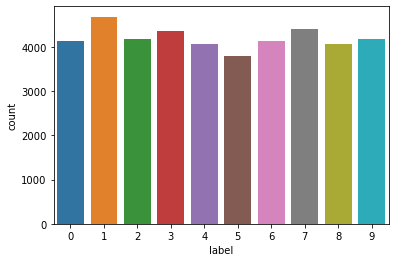

In [6]:
sns.countplot(x= y)

In [7]:
X.shape

(42000, 784)

In [8]:
X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [10]:
X.shape

(42000, 784)

In [11]:
print(sqrt(784))

28.0


In [12]:
X = X.to_numpy()

In [13]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
X = X / 255.0

In [15]:
print(np.unique(X, return_counts=True))

(array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.2901

In [16]:
X.shape

(42000, 784)

In [17]:
X = X.reshape(X.shape[0], 28, 28)

In [18]:
X.shape

(42000, 28, 28)

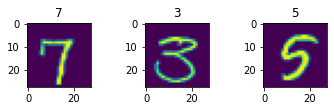

In [19]:
for i in range(6,9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i])
    plt.title(y_train[i]);

In [20]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [21]:
y = y.to_numpy()

In [22]:
print(np.unique(y, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188],
      dtype=int64))


In [23]:
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)